# Praktikum 2
### Mengimpor Library:

In [2]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Mengimpor Dataset
Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [3]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

### Feature Scaling
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Fitting SVR ke Dataset:

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [5]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

d:\NaniKaSuru\Polinema\Machine-Learning-2025\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Visualisasi Hasil SVR:

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

C:\Users\Raruu\AppData\Local\Temp\ipykernel_22796\1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


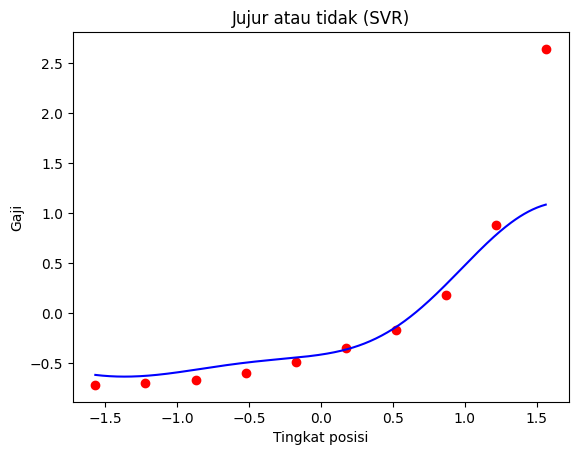

In [6]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

### Prediksi Hasil:
- Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
- Menskalakan fitur prediksi menggunakan sc_X.transform.
- Melakukan prediksi menggunakan model SVR yang telah dilatih.
- Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [7]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### Menampilkan Hasil:

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [8]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### Evaluasi Model SVR

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [9]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
